# Data Preprocessing

In [3]:
import os, re, sys
import fcsparser
import pandas as pd

sys.path.insert(0, '..')
from scripts.aux_functions import *

In [2]:
# Import raw data
base_dir = "/Users/xiaoqin/Dropbox/UCL/Experiments/CyTOF/Signal Perturbation/Signal Perturbation - Analysis"
input_dir = f"{base_dir}/raw_data"
output_dir = f"{base_dir}/preprocessed_data"

filelist = [f for f in os.listdir(input_dir) if f.endswith(".txt")]
filelist

FileNotFoundError: [Errno 2] No such file or directory: '/Users/xiaoqin/Dropbox/UCL/Experiments/CyTOF/Signal Perturbation/Signal Perturbation - Analysis/raw_data'

In [6]:
# Preprocessing

experiment_id = "Perturb" #! Experiment metadata
batch_id = "B1"

for i in filelist:
    file_path = f"{input_dir}/{i}"
    df_file = pd.read_csv(file_path, sep="\t")
    print(i)

    shape_before = df_file.shape
    df_file_cols = list(df_file.columns)

    #%% Perform renaming and filtering
    renamed_columns = rename_columns(df_file_cols)
    columns_to_keep, filtered_columns = filter_columns(renamed_columns)
    df_file.columns = renamed_columns
    f_reduced = df_file[columns_to_keep].iloc[:].copy()
    print("Removed the following columns: ", filtered_columns)

    # Add Cell_Index column
    if "Cell_Index" not in f_reduced.columns:
        print("MISSING CELL_INDEX")
        f_reduced.reset_index(inplace=True)
        f_reduced.rename({"index": "Cell_Index"}, axis="columns", inplace=True)
    f_reduced["Cell_Index"] = pd.to_numeric(f_reduced["Cell_Index"])

    # Saving files
    f_reduced.to_csv(f"{output_dir}/{batch_id}_{experiment_id}_{i}", index=False, sep="\t")

WT_024_Ctrl-SIS3_3.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_009_Ctrl-CHIR99021_3.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_025_Ctrl-Trametinib_1.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_010_Ctrl-Dasatinib_1.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_027_Ctrl-Trametinib_3.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_001_Ctrl-Ctrl_1.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_023_Ctrl-SIS3_2.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_018_Ctrl-ICG001_3.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_022_Ctrl-SIS3_1.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_014_Ctrl-GDC0941_2.txt
Removed the following columns:  ['106Cd', '110Cd', '144Nd', '151Eu']
WT_008_Ctrl-CHIR99021_2.txt
Removed the following col

# Data Integration

In [7]:
import pandas as pd
import os, re
from scripts.aux_functions import *

In [8]:
# Import data
input_dir = f"{base_dir}/preprocessed_data"
output_dir = f"{base_dir}/output"

file_list = [f for f in os.listdir(input_dir) if f.endswith(".txt")]
len(file_list)
file_list

['B1_Perturb_WT_009_Ctrl-CHIR99021_3.txt',
 'B1_Perturb_WT_019_Ctrl-PF573228_1.txt',
 'B1_Perturb_WT_004_Ctrl-CA3_1.txt',
 'B1_Perturb_WT_014_Ctrl-GDC0941_2.txt',
 'B1_Perturb_WT_025_Ctrl-Trametinib_1.txt',
 'B1_Perturb_WT_001_Ctrl-Ctrl_1.txt',
 'B1_Perturb_WT_023_Ctrl-SIS3_2.txt',
 'B1_Perturb_WT_005_Ctrl-CA3_2.txt',
 'B1_Perturb_WT_010_Ctrl-Dasatinib_1.txt',
 'B1_Perturb_WT_027_Ctrl-Trametinib_3.txt',
 'B1_Perturb_WT_024_Ctrl-SIS3_3.txt',
 'B1_Perturb_WT_007_Ctrl-CHIR99021_1.txt',
 'B1_Perturb_WT_018_Ctrl-ICG001_3.txt',
 'B1_Perturb_WT_008_Ctrl-CHIR99021_2.txt',
 'B1_Perturb_WT_006_Ctrl-CA3_3.txt',
 'B1_Perturb_WT_011_Ctrl-Dasatinib_2.txt',
 'B1_Perturb_WT_022_Ctrl-SIS3_1.txt',
 'B1_Perturb_WT_013_Ctrl-GDC0941_1.txt',
 'B1_Perturb_WT_012_Ctrl-Dasatinib_3.txt',
 'B1_Perturb_WT_002_Ctrl-Ctrl_2.txt',
 'B1_Perturb_WT_020_Ctrl-PF573228_2.txt',
 'B1_Perturb_WT_021_Ctrl-PF573228_3.txt',
 'B1_Perturb_WT_026_Ctrl-Trametinib_2.txt',
 'B1_Perturb_WT_003_Ctrl-Ctrl_3.txt',
 'B1_Perturb_WT_017_Ctr

In [9]:
# ---
# Integration
# ---

# Naming convention:
# batch_experiment_barcode_genotype_ligand-inhibitor_replicate
# e.g. "B0_Perturb_WT_001_Ctrl-ICG001_1.txt"

integrated = pd.DataFrame()
for f in file_list:
    df_new = pd.read_csv(f"{input_dir}/{f}", sep="\t")

    batch = f.split("_")[0]
    barcode = f.split("_")[3]
    genotype = f.split("_")[2]
    media = f.split("_")[4]
    replicate = f.split("_")[-1].split(".")[0]

    df_new["batch"] = batch
    df_new["barcode"] = barcode
    df_new["genotype"] = genotype
    df_new["media"] = media
    df_new["replicate"] = replicate
    df_new["culture"] = genotype + "_" + media
    df_new["condition"] = batch + "_" + genotype + "_" + media + "_" + replicate
    df_new["ligand"] = media.split("-")[0]
    df_new["inhibitor"] = media.split("-")[1]

    # break down genotype
    df_new["A"] = 1 if "A" in genotype else 0
    df_new["K"] = 1 if "K" in genotype else 0

    integrated = pd.concat([integrated, df_new])
integrated.head()
integrated.shape

# integrated = rename_panel(integrated)  # Revome the version number etc.
integrated = integrated.rename(
    columns=lambda x: re.sub("_v[0-9]+$", "", x)
)  # Revome the version number
integrated.columns.values
integrated.to_csv(f"{output_dir}/integrated_dataframe_all-cells.csv", index=False)

## Mean Centre

In [38]:
df = pd.read_csv(f"{input_dir}/integrated_dataframe_all-cells.csv")
df.groupby("genotype")
df.head()

,Cell_Index,Time,Event_length,Center,Width,Residual,Offset,Amplitude,89Y_pHH3_S28,111Cd_CD44,...,barcode,genotype,media,replicate,culture,condition,ligand,inhibitor,A,K
0,1,100299.468750,26.0,454.656677,258.354797,65.327301,0.619913,64.663940,4.555396,10.794646,...,16,K,Ctrl-ICG001,1,K_Ctrl-ICG001,B1_K_Ctrl-ICG001_1,Ctrl,ICG001,0,1
1,2,100555.523438,24.0,418.744446,237.724274,82.283699,8.978930,69.740807,8.967634,253.283630,...,16,K,Ctrl-ICG001,1,K_Ctrl-ICG001,B1_K_Ctrl-ICG001_1,Ctrl,ICG001,0,1
2,3,103574.125000,26.0,414.570251,261.636017,37.532242,1.154834,65.958435,7.080341,1.164816,...,16,K,Ctrl-ICG001,1,K_Ctrl-ICG001,B1_K_Ctrl-ICG001_1,Ctrl,ICG001,0,1
3,4,105195.312500,26.0,477.496277,262.372925,43.322414,0.719731,59.602379,3.475085,74.362488,...,16,K,Ctrl-ICG001,1,K_Ctrl-ICG001,B1_K_Ctrl-ICG001_1,Ctrl,ICG001,0,1
4,5,106354.789062,31.0,454.822021,220.794678,65.867874,7.130526,106.299072,2.269206,0.000000,...,16,K,Ctrl-ICG001,1,K_Ctrl-ICG001,B1_K_Ctrl-ICG001_1,Ctrl,ICG001,0,1


In [61]:
df_data = master_df_subset(df, full_panel).reset_index()  # All measurements
df_metadata = master_df_subset(df, metadata_columns).reset_index()  # All metadata
df_genotype = df["genotype"].reset_index()  # Genotype to group by
df_new = pd.merge(df_genotype, df_data, on="index").drop(columns=["index"])
df_new

#! Mean Centering by genotype (across all conditions)
df_mean_centre = df_new.iloc[:, 1:] - df_new.groupby("genotype").transform("mean")
df_mean_centre = df_mean_centre.reset_index()
df_mean_centre = pd.merge(df_mean_centre, df_metadata, on="index").drop(
    columns=["index"]
)
df_mean_centre.head()
df_mean_centre.to_csv("./output/integrated_dataframe_all-cells_mean-centred-by-genotype.csv")

# EMD Calculation

In [18]:
import os
import pandas as pd
import scprep
from scipy.stats import zscore
from scripts.aux_functions import *
from scripts.__init__ import non_marker

In [4]:
# Import data
base_dir = "/Users/xiaoqin/Dropbox/UCL/Experiments/CyTOF/Signal Perturbation/Signal Perturbation - Analysis"
input_dir = f"{base_dir}/output"
os.makedirs(f"{base_dir}/output/emd", exist_ok=True)
output_dir = f"{base_dir}/output/emd"

In [19]:
# Generate full_panel and metadata_columns on the fly
df = pd.read_csv(f"{input_dir}/integrated_dataframe_all-cells.csv")
df_columns = df.columns.values.tolist()
column_filtered = list(
    filter(lambda x: x not in non_marker, df_columns)
)  # Exclude non-markers

full_panel = [i for i in column_filtered if i[0].isdigit()]
metadata_columns = list(filter(lambda x: x not in full_panel, column_filtered))

In [13]:
# EMD calculation
subsets = ["all-cells"] #! Analysis metadata

for subset in subsets:
    # Import raw data and perform arcsinh transformation
    subset_df = pd.read_csv(f"{input_dir}/integrated_dataframe_{subset}.csv")

    # Arcsinh transformation
    subset_df = arcsinh_transf(subset_df, full_panel, 5)

    #! Set reference for EMD calculation
    emd_ref = subset_df.loc[subset_df["culture"] == "WT_Ctrl-Ctrl"]  # for all cells

    # EMD calculation
    emd_df = pd.DataFrame()
    emd_df_master = pd.DataFrame()
    emd_infodict = {}

    # Get all experimental conditions for which EMD is going to be calculated
    conditions = subset_df["condition"].unique().tolist()
    len(conditions)

    # Compute EMD and compile the result in a master dataframe
    for condition in conditions:
        compare_from = subset_df.loc[subset_df["condition"] == condition]

        df = calculate_emd(
            full_panel,  # all non-marker and non-metadata columns
            compare_from,
            emd_ref, 
            metadata_columns,
            emd_df,
            emd_infodict,
        )
        emd_df_master = pd.concat([emd_df_master, df])
    emd_df_master.head()

    # Long to wide transformation
    emd_df_master_wide = emd_df_master.pivot_table(
        index=metadata_columns,
        columns="marker",
        values="EMD_arc",
    ).reset_index()

    emd_df_master_wide.head()
    emd_df_master_wide.to_csv(
        f"{output_dir}/emd_df_master_{subset}_no-norm.csv",
        index=False,
    )

    # Z-score normalisation
    # retrieve data and metadata
    emd_df_master_wide_metadata = emd_df_master_wide[metadata_columns].reset_index()
    emd_df_master_wide_data = master_df_subset(emd_df_master_wide, full_panel)

    # z-score
    emd_df_master_wide_data_scaled = emd_df_master_wide_data.apply(zscore).reset_index()

    emd_df_master_wide_data.shape
    emd_df_master_wide_metadata.shape
    emd_df_master_wide_data_scaled = pd.merge(
        emd_df_master_wide_data_scaled, emd_df_master_wide_metadata, on="index"
    )
    emd_df_master_wide_data_scaled.drop(columns=["index"], inplace=True)
    emd_df_master_wide_data_scaled.head()

    emd_df_master_wide_data_scaled.to_csv(
        f"{output_dir}/emd_df_master_{subset}_z-score.csv", index=False
    )

# EMD-PCA

In [14]:
import os, sys
import pandas as pd
import numpy as np
import phate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, '..') # Add the script folder to the path
from scripts.aux_functions import *
from scripts import colours

from IPython.core.interactiveshell import InteractiveShell
%load_ext nb_black

<IPython.core.display.Javascript object>

In [21]:
# Import data
input_dir = f"{base_dir}/output/emd"
output_dir = f"{base_dir}/output/"

# Set experimental metadata
subset = "all-cells"
norm = "no-norm" # no-norm

emd_df_master_wide = pd.read_csv(f"{input_dir}/emd_df_master_{subset}_{norm}.csv")
emd_df_master_wide.head()
emd_df_master_wide.columns

# Define markers used for PCA
dr_panel = [
    # cell-type
    "111Cd_CD44",
    "113In_CEACAM1_CD66a",
    "115In_Pan-CK",
    # "116Cd_GFP",
    "143Nd_C-MYC_1",
    "162Dy_LRIG1_1",
    "169Tm_EPHB2",
    "171Yb_SOX9_5",
    "174Yb_Clusterin_1",
    "175Lu_Survivin_2",
    "176Yb_FABP2",
]

dr_matrix = master_df_subset(emd_df_master_wide, dr_panel)

Index(['batch', 'barcode', 'genotype', 'media', 'replicate', 'culture',
       'condition', 'ligand', 'inhibitor', 'A', 'K', '111Cd_CD44',
       '113In_CEACAM1_CD66a', '115In_Pan-CK', '116Cd_GFP', '127I_IdU',
       '141Pr_pPDPK1_S241', '142Nd_cCaspase 3_D175', '143Nd_C-MYC_1',
       '145Nd_pNDRG1_T346', '146Nd_pMKK4_SEK1_S257', '147Sm_pBTK_Y511_1',
       '148Nd_pSRC_Y418', '149Sm_p4EBP1_T37_T46', '150Nd_pRB_S807_S811',
       '152Sm_pAKT_T308', '153Eu_pCREB_S133', '154Sm_pSMAD1_5_9',
       '155Gd_pAKT_S473_3', '156Gd_pNF-kB p65_S529',
       '157Gd_pMKK3_MKK6_S189_207', '158Gd_pP38 MAPK_T180_Y182',
       '159Tb_pMAPKAPK2_T334', '160Gd_pAMPKa_T172', '161Dy_pBAD_S112',
       '162Dy_LRIG1_1', '163Dy_pP90RSK_T359_Hu', '164Dy_pP120-Catenin_T310',
       '165Ho_Beta-catenin_Active_1', '166Er_pGSK-3b_S9',
       '167Er_pERK_1_2_T202_Y204', '168Er_pSMAD2_3', '169Tm_EPHB2',
       '170Er_pMEK1_2_S221', '171Yb_SOX9_5', '172Yb_pS6_S240_S244_2',
       '173Yb_Cyclin B1_2', '174Yb_Clusterin_

<IPython.core.display.Javascript object>

In [26]:
#---
# PCA
#---

pca = PCA(n_components=2)
pca.fit(dr_matrix)

Y_pca = pca.transform(dr_matrix)
pc1 = round(pca.explained_variance_ratio_[0] * 100, 2)  # %variance explained
pc2 = round(pca.explained_variance_ratio_[1] * 100, 2)

# Join PCA coordinates with EMD dataframe
Y_pca_df = pd.DataFrame(Y_pca).reset_index()
emd_df_master_wide = emd_df_master_wide.reset_index(drop=True).reset_index()
Y_pca_df = pd.merge(emd_df_master_wide, Y_pca_df, on="index")
Y_pca_df.drop(columns=["index"], inplace=True)
emd_df_master_wide.drop(columns="index", inplace=True)
Y_pca_df.head()

,batch,barcode,genotype,media,replicate,culture,condition,ligand,inhibitor,A,...,174Yb_Clusterin_1,175Lu_Survivin_2,176Yb_FABP2,191Ir_DNA 1,193Ir_DNA 2,194Pt_Cisplatin,209Bi_DiMeHH3_K4,89Y_pHH3_S28,0,1
0,B1,1,WT,Ctrl-Ctrl,1,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_1,Ctrl,Ctrl,0,...,0.035177,0.007109,0.101185,0.004837,0.004112,-0.029532,-0.073953,0.027262,-0.686075,-0.032976
1,B1,2,WT,Ctrl-Ctrl,2,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_2,Ctrl,Ctrl,0,...,0.028816,-0.008250,0.020644,0.007341,0.006855,0.014796,0.024113,0.009258,-0.691959,-0.028332
2,B1,3,WT,Ctrl-Ctrl,3,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_3,Ctrl,Ctrl,0,...,-0.045218,0.017073,-0.150212,-0.013587,-0.011996,0.024309,0.100352,-0.039896,-0.581528,0.077869
3,B1,4,WT,Ctrl-CA3,1,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_1,Ctrl,CA3,0,...,-0.192884,-0.161129,-0.568091,0.033760,0.035321,0.206393,-1.079694,-0.283600,0.519399,0.312843
4,B1,5,WT,Ctrl-CA3,2,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_2,Ctrl,CA3,0,...,-0.252106,-0.223091,-0.580515,-0.038835,-0.036310,0.327451,-1.122951,-0.338736,0.617457,0.380987


<IPython.core.display.Javascript object>

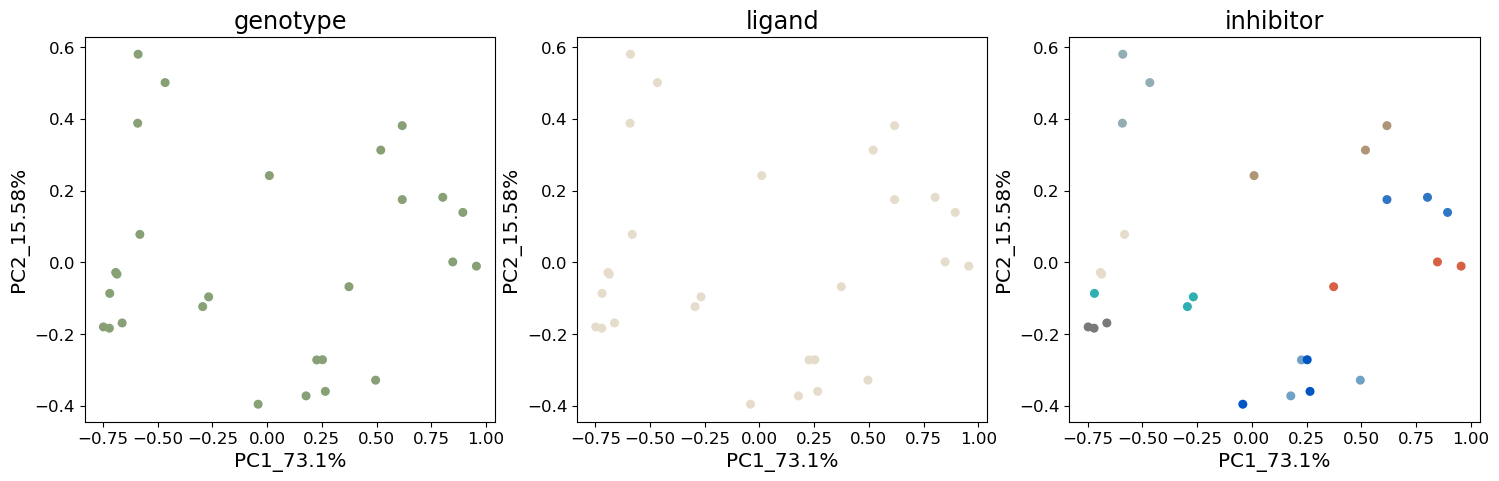

<IPython.core.display.Javascript object>

In [27]:
# ---
# Metadata
# ---

fig, axes = plt.subplots(1,3, figsize=(18, 5))

facets = ["genotype", "ligand", "inhibitor"]
for facet, ax in zip(facets, axes):
    scprep.plot.scatter2d(
        Y_pca_df.iloc[:, -2:],
        c=Y_pca_df.loc[:, facet],
        cmap=colours,
        ticks=True,
        s=30,
        xlabel=f"PC1_{pc1}%",
        ylabel=f"PC2_{pc2}%",
        legend=False,
        title=facet,
        ax=ax,
    )


# EMD-PHATE

In [20]:
import os, sys
import pandas as pd
import numpy as np
import phate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, '..') # Add the script folder to the path
from scripts.aux_functions import *
from scripts import colours

from IPython.core.interactiveshell import InteractiveShell
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [28]:
# Import data
input_dir = f"{base_dir}/output/emd"
output_dir = f"{base_dir}/output/"

# Set experimental metadata
subset = "all-cells"
norm = "no-norm" # no-norm

emd_df_master_wide = pd.read_csv(f"{input_dir}/emd_df_master_{subset}_{norm}.csv")
emd_df_master_wide.head()
emd_df_master_wide.columns

# Define markers used for PCA
dr_panel = [
    # cell-type
    "111Cd_CD44",
    "113In_CEACAM1_CD66a",
    "115In_Pan-CK",
    # "116Cd_GFP",
    "143Nd_C-MYC_1",
    "162Dy_LRIG1_1",
    "169Tm_EPHB2",
    "171Yb_SOX9_5",
    "174Yb_Clusterin_1",
    "175Lu_Survivin_2",
    "176Yb_FABP2",
]

dr_matrix = master_df_subset(emd_df_master_wide, dr_panel)

<IPython.core.display.Javascript object>

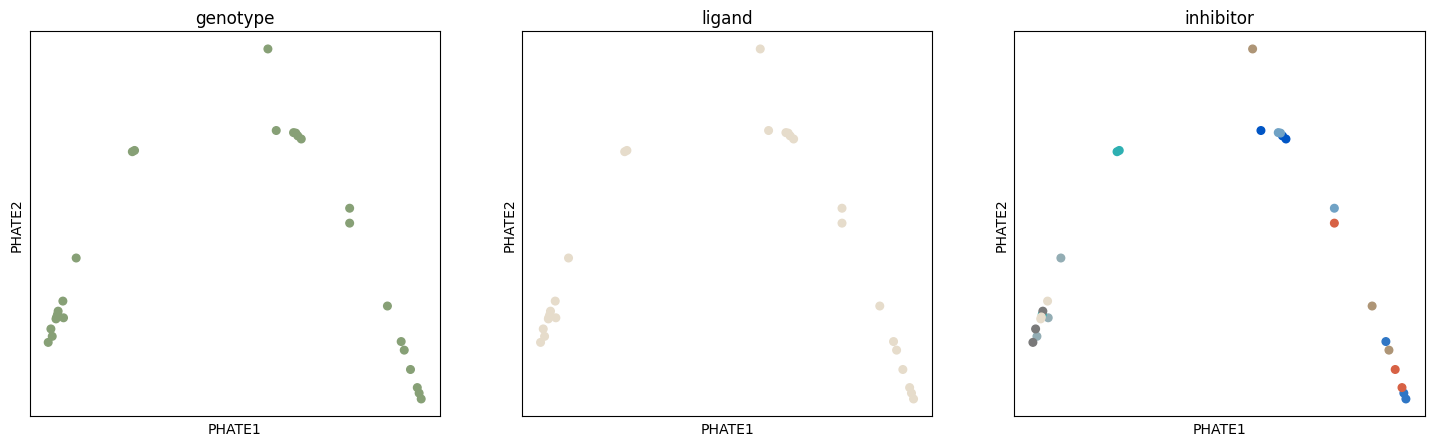

<IPython.core.display.Javascript object>

In [29]:
knn = 8
t = 10

phate_operator = phate.PHATE(
    knn=knn, t=t, random_state=42, mds_solver="smacof", verbose=False
)
Y_phate = phate_operator.fit_transform(dr_matrix)

# Join PHATE coordinates with EMD dataframe
Y_phate_df = pd.DataFrame(Y_phate).reset_index()
emd_df_master_wide = emd_df_master_wide.reset_index(drop=True).reset_index()
Y_phate_df = pd.merge(emd_df_master_wide, Y_phate_df, on="index")
Y_phate_df.drop(columns=["index"], inplace=True)
emd_df_master_wide.drop(columns="index", inplace=True)

# ---
# Metadata
# ---

fig, axes = plt.subplots(1,3, figsize=(18, 5))

facets = ["genotype", "ligand", "inhibitor"]
for facet, ax in zip(facets, axes):
    scprep.plot.scatter2d(
        Y_phate_df.iloc[:, -2:],
        c=Y_phate_df.loc[:, facet],
        cmap=colours,
        ticks=False,
        s=30,
        label_prefix="PHATE",
        legend=False,
        title=facet,
        ax=ax,
        fontsize=7,
    )